In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
df = pd.read_csv("nyc-rolling-sales_cleaned.csv")
df.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS,BUILDING_CLASS,SALES,SALE_DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,,12/14/2016


In [23]:
df.dtypes

BOROUGH                       int64
NEIGHBORHOOD                 object
BUILDING CLASS CATEGORY      object
TAX CLASS AT PRESENT         object
BLOCK                         int64
LOT                           int64
EASE-MENT                    object
BUILDING CLASS AT PRESENT    object
ADDRESS                      object
APARTMENT NUMBER             object
ZIP CODE                      int64
RESIDENTIAL_UNITS             int64
COMMERCIAL_UNITS              int64
TOTAL_UNITS                   int64
LAND_SQUARE_FEET             object
GROSS_SQUARE_FEET            object
YEAR_BUILT                    int64
TAX_CLASS                     int64
BUILDING_CLASS               object
SALES                        object
SALE_DATE                    object
dtype: object

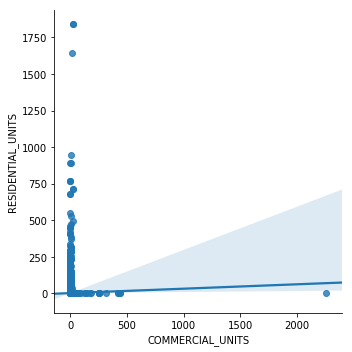

In [20]:
sns.lmplot(x='COMMERCIAL_UNITS', y='RESIDENTIAL_UNITS',data=df)

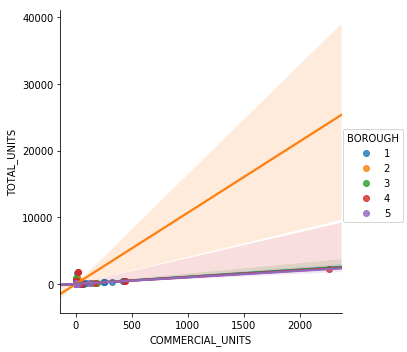

In [35]:
sns.lmplot(x='COMMERCIAL_UNITS',y='TOTAL_UNITS',hue='BOROUGH',data=df)

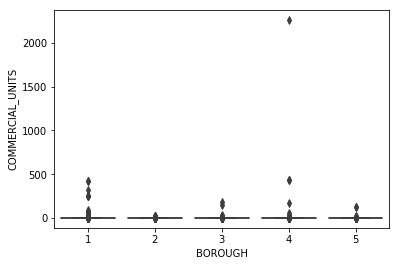

In [21]:
sns.boxplot(x='BOROUGH',y='COMMERCIAL_UNITS',data=df)

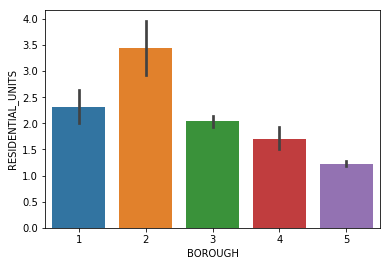

In [31]:
sns.barplot(x='BOROUGH',y='RESIDENTIAL_UNITS',data=df)

In [32]:
df.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,YEAR_BUILT,TAX_CLASS
BOROUGH,1.000000,0.417001,-0.277848,0.256564,-0.023229,-0.005503,-0.023346,0.108303,-0.315163
BLOCK,0.417001,1.000000,-0.229118,0.234063,-0.015628,-0.003517,-0.015888,0.071262,-0.287300
LOT,-0.277848,-0.229118,1.000000,-0.145802,-0.034303,-0.010953,-0.033169,-0.289463,0.296680
ZIP CODE,0.256564,0.234063,-0.145802,1.000000,0.005578,0.000726,0.005415,0.330708,-0.142915
RESIDENTIAL_UNITS,-0.023229,-0.015628,-0.034303,0.005578,1.000000,0.015653,0.888309,0.025380,-0.001074
COMMERCIAL_UNITS,-0.005503,-0.003517,-0.010953,0.000726,0.015653,1.000000,0.472998,0.006428,0.049586
TOTAL_UNITS,-0.023346,-0.015888,-0.033169,0.005415,0.888309,0.472998,1.000000,0.024568,0.026429
YEAR_BUILT,0.108303,0.071262,-0.289463,0.330708,0.025380,0.006428,0.024568,1.000000,-0.187609
TAX_CLASS,-0.315163,-0.287300,0.296680,-0.142915,-0.001074,0.049586,0.026429,-0.187609,1.000000


In [39]:
import statsmodels.formula.api as sm

result = sm.ols(formula='RESIDENTIAL_UNITS ~ TOTAL_UNITS + YEAR_BUILT -1',data=df).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      RESIDENTIAL_UNITS   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                 1.611e+05
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:06:02   Log-Likelihood:            -2.9232e+05
No. Observations:               84548   AIC:                         5.846e+05
Df Residuals:                   84546   BIC:                         5.847e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TOTAL_UNITS     0.7828      0.001    562.254      0.000       0.780       0.786
YEAR_BUILT      0.0001   1.42e-05     10.168      0.000       0.000       0.000
==============================================================================
Omnibus:                   376454.703   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    4036010910082.409
Skew:                        -144.601   Prob(JB):                         0.00
Kurtosis:                   33849.539   Cond. No.                         98.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
import statsmodels.formula.api as sm

result = sm.ols(formula='COMMERCIAL_UNITS ~  RESIDENTIAL_UNITS + TOTAL_UNITS -1',data=df).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       COMMERCIAL_UNITS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.740e+07
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:19:49   Log-Likelihood:                 24302.
No. Observations:               84548   AIC:                        -4.860e+04
Df Residuals:                   84546   BIC:                        -4.858e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
RESIDENTIAL_UNITS    -0.9996   8.13e-05  -1.23e+04      0.000      -1.000      -0.999
TOTAL_UNITS           0.9996   7.16e-05    1.4e+04      0.000       0.999       1.000
==============================================================================
Omnibus:                    68758.446   Durbin-Watson:                   0.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         49371186.008
Skew:                          -2.732   Prob(JB):                         0.00
Kurtosis:                     121.257   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""